<a href="https://colab.research.google.com/github/usama879/creditcardfraudproject/blob/main/CreditCardFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Environment Set Up

##1.1 Installing Libraires

In [1]:
#!pip install pandas scikit-learn numpy matplotlib -U gdown


##1.2 Configure GUI Framework

We have selected **Flask** as our GUI framework.

#2.Dataset Exploration


We explored several publicly available cybersecurity and fraud detection datasets, including:

- NSL-KDD (Network Intrusion)
- CICIDS2017 (Network Traffic)
- Credit Card Fraud (Kaggle)
- Synthetic Transactional Fraud (Sparkov + Faker)

After evaluating relevance, size, feature diversity, and suitability for real-time fraud detection, we selected the **Credit Card Fraud Detection** dataset generated using Sparkov and Faker libraries.

**Dataset Summary:**
- Total records: 1,852,394
- Fields: 22
- Target: `is_fraud` (binary classification)
- Time range: Jan 2019 – Dec 2020
- Includes customer details, merchant info, geolocation, and transaction history

This dataset provides a rich base for training, evaluating, and deploying machine learning models for fraud prediction.

#3.Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display
import seaborn as sns
from datetime import date
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import gdown
from sklearn.preprocessing import StandardScaler


print("Environment setup complete all the Libraries loaded successfully.")


Environment setup complete all the Libraries loaded successfully.


#4.Data Loading

In [3]:
file_id = '1YU4yMY1_uMj2EnDVEEaVXUHEuBwozcMX'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'CreditCardFraud.csv', quiet=False)

df = pd.read_csv('CreditCardFraud.csv')


Downloading...
From (original): https://drive.google.com/uc?id=1YU4yMY1_uMj2EnDVEEaVXUHEuBwozcMX
From (redirected): https://drive.google.com/uc?id=1YU4yMY1_uMj2EnDVEEaVXUHEuBwozcMX&confirm=t&uuid=2056e3a6-c0a2-4d38-b42d-a0e2af703237
To: /content/CreditCardFraud.csv
100%|██████████| 523M/523M [00:08<00:00, 64.4MB/s]


##4.1 First 5 Rows of Dataset

In [4]:
display(df.head())

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


##4.2 Last 5 Rows of Dataset

In [5]:
display(df.tail())

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
1852393,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,Edmond,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


##4.3 Dataset Dimensions

In [6]:
print("(Rows, Columns):", df.shape)


(Rows, Columns): (1852394, 22)


##4.4 Column Names

In [7]:
print(df.columns.tolist())

['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']


##4.5 Columns Datatype

In [8]:
column_dtypes = df.dtypes.to_frame(name='DataType')
column_dtypes.reset_index(inplace=True)
column_dtypes.columns = ['Column', 'DataType']
display(column_dtypes)

,Column,DataType
0,trans_date_trans_time,object
1,cc_num,int64
2,merchant,object
3,category,object
4,amt,float64
5,first,object
6,last,object
7,gender,object
8,street,object
9,city,object


##4.6 Dataset Structure

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

#5.Exploratory Data Analysis (EDA)

##5.1 Summary Statistics (Mean, Median, Std, Min, Max, Range)

In [10]:
credit_summary = df.describe().T
credit_summary['range'] = credit_summary['max'] - credit_summary['min']
credit_summary[['mean', '50%', 'std', 'min', 'max', 'range']]


,mean,50%,std,min,max,range
cc_num,4.173860e+17,3.521417e+15,1.309115e+18,6.041621e+10,4.992346e+18,4.992346e+18
amt,7.006357e+01,4.745000e+01,1.592540e+02,1.000000e+00,2.894890e+04,2.894790e+04
zip,4.881326e+04,4.817400e+04,2.688185e+04,1.257000e+03,9.992100e+04,9.866400e+04
lat,3.853931e+01,3.935430e+01,5.071470e+00,2.002710e+01,6.669330e+01,4.666620e+01
long,-9.022783e+01,-8.747690e+01,1.374789e+01,-1.656723e+02,-6.795030e+01,9.772200e+01
city_pop,8.864367e+04,2.443000e+03,3.014876e+05,2.300000e+01,2.906700e+06,2.906677e+06
unix_time,1.358674e+09,1.357089e+09,1.819508e+07,1.325376e+09,1.388534e+09,6.315836e+07
merch_lat,3.853898e+01,3.936890e+01,5.105604e+00,1.902742e+01,6.751027e+01,4.848284e+01
merch_long,-9.022794e+01,-8.744069e+01,1.375969e+01,-1.666716e+02,-6.695090e+01,9.972067e+01
is_fraud,5.210015e-03,0.000000e+00,7.199217e-02,0.000000e+00,1.000000e+00,1.000000e+00


#6.Data Visualizations

In [11]:
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("Set2")
plt.rcParams["figure.figsize"] = (10, 6)


##6.1 Histograms of Key Numerical Features

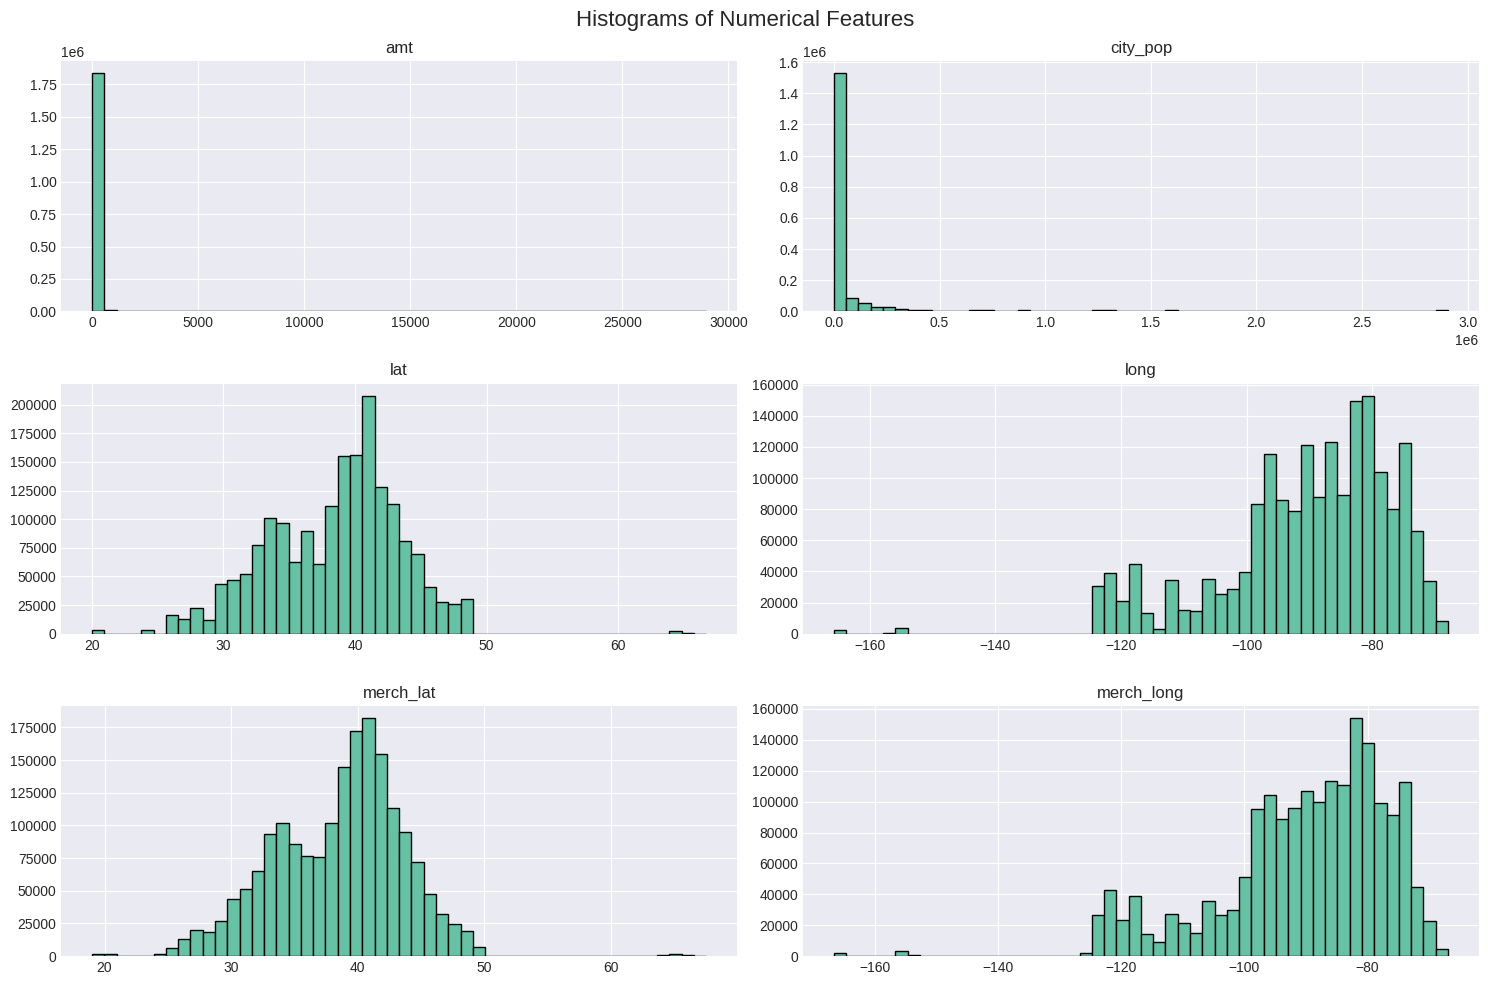

In [12]:
numeric_cols = ['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long']
df[numeric_cols].hist(bins=50, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


##6.2 Box Plots to Detect Outliers

In [13]:
numeric_cols = ['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long']
outlier_counts = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_count = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    outlier_counts[col] = outlier_count

outlier_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
outlier_df = outlier_df.sort_values(by='Outlier Count', ascending=False)

print("Number of Outliers per Feature (IQR Method):")
display(outlier_df)


Number of Outliers per Feature (IQR Method):


,Outlier Count
city_pop,346191
amt,95054
long,71026
merch_long,59972
merch_lat,7063
lat,6612


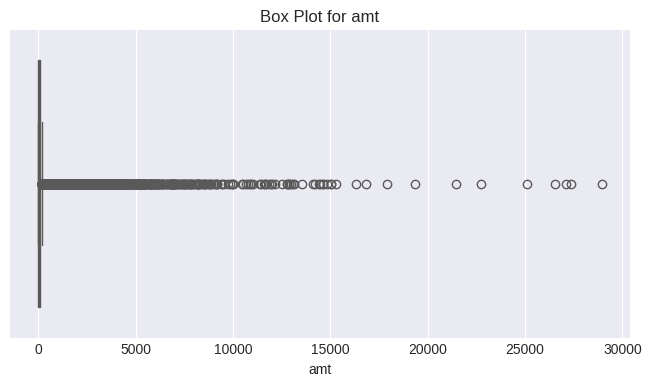

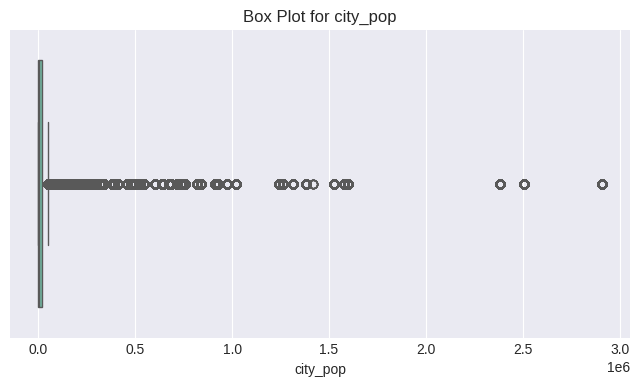

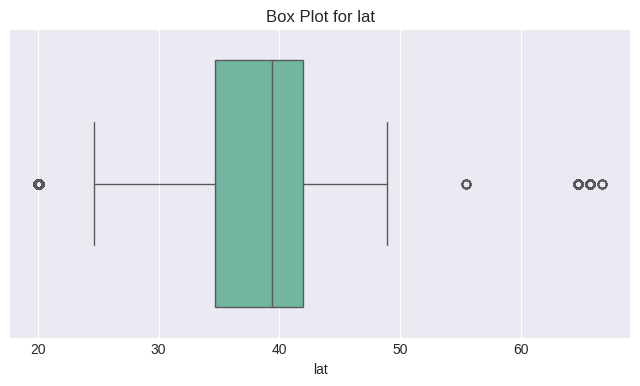

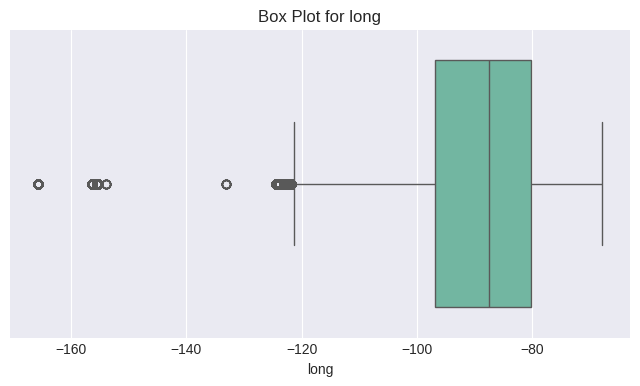

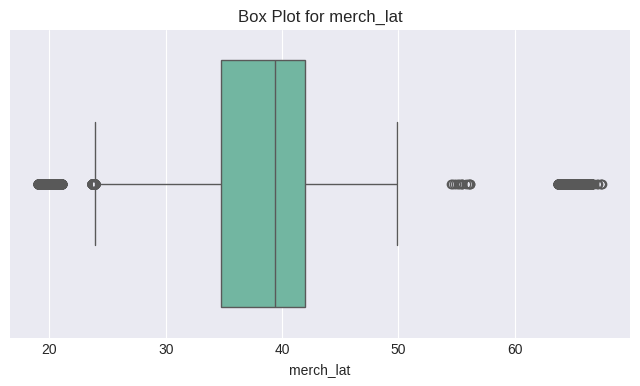

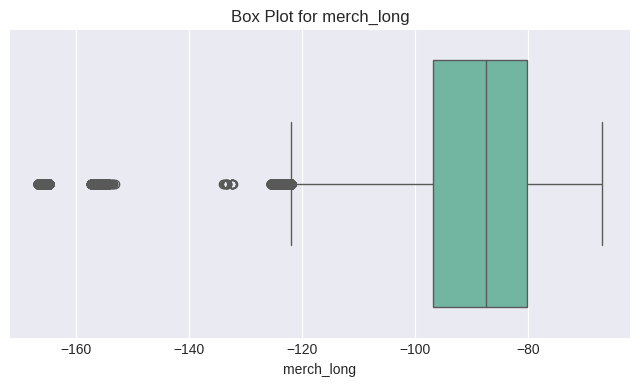

In [14]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')
    plt.xlabel(col)
    plt.show()


##6.3 Heatmap of Correlation Matrix

In [15]:
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
print("Correlation Matrix (Table View):")
display(corr_matrix.round(3))


Correlation Matrix (Table View):


,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
cc_num,1.000,0.002,0.042,-0.059,-0.048,-0.009,0.000,-0.058,-0.048,-0.001
amt,0.002,1.000,0.002,-0.001,-0.001,0.005,-0.002,-0.001,-0.001,0.209
zip,0.042,0.002,1.000,-0.115,-0.910,0.078,0.001,-0.114,-0.909,-0.002
lat,-0.059,-0.001,-0.115,1.000,-0.015,-0.155,0.001,0.994,-0.015,0.003
long,-0.048,-0.001,-0.910,-0.015,1.000,-0.052,-0.001,-0.015,0.999,0.001
city_pop,-0.009,0.005,0.078,-0.155,-0.052,1.000,-0.002,-0.154,-0.052,0.000
unix_time,0.000,-0.002,0.001,0.001,-0.001,-0.002,1.000,0.001,-0.001,-0.013
merch_lat,-0.058,-0.001,-0.114,0.994,-0.015,-0.154,0.001,1.000,-0.015,0.003
merch_long,-0.048,-0.001,-0.909,-0.015,0.999,-0.052,-0.001,-0.015,1.000,0.001
is_fraud,-0.001,0.209,-0.002,0.003,0.001,0.000,-0.013,0.003,0.001,1.000


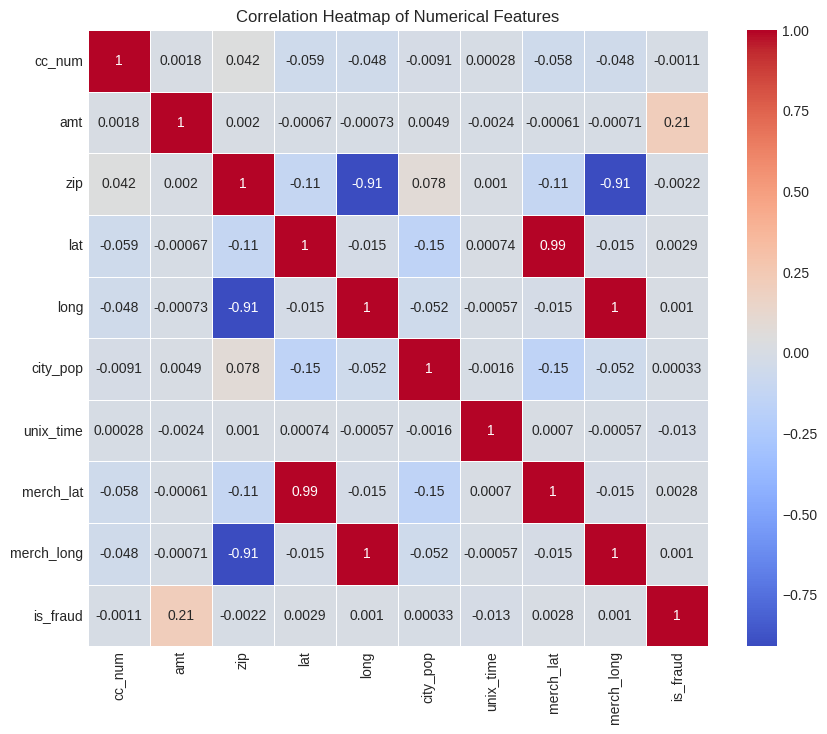

In [16]:
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


##6.4 Pairplot to Explore Patterns

In [17]:
sample_df = df[['amt', 'city_pop', 'lat', 'long', 'is_fraud']].sample(n=1000, random_state=42)
print("Sample of Selected Features:")
display(sample_df)


Sample of Selected Features:


,amt,city_pop,lat,long,is_fraud
1541144,59.91,18182,45.7801,-111.1439,0
1731581,3.96,76383,42.6911,-71.1605,0
354659,51.17,16305,42.5978,-82.8823,0
1493788,2.06,5161,34.2853,-91.3336,0
468148,6.58,1263321,32.7699,-96.7430,0
...,...,...,...,...,...
1212481,50.62,776,37.7681,-75.6664,0
434765,57.98,6120,44.2320,-74.4905,0
611326,19.10,67082,34.0480,-85.9246,0
751331,5.60,124967,40.6747,-74.2239,0


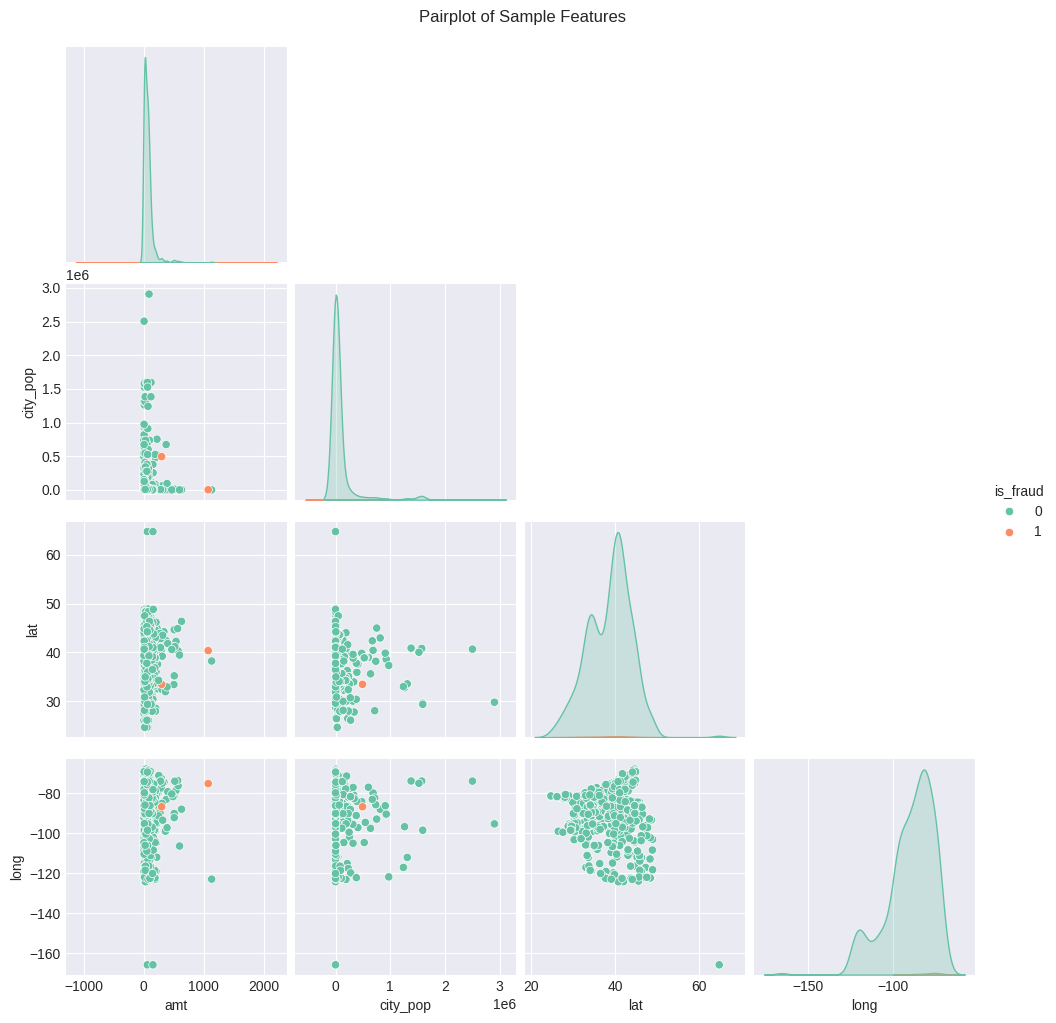

In [18]:
sample_df = df[['amt', 'city_pop', 'lat', 'long', 'is_fraud']].sample(n=1000, random_state=42)

sns.pairplot(sample_df, hue='is_fraud', diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Sample Features", y=1.02)
plt.show()


#7.Analyzing Feature Relationships


##7.1 Correlation of Numeric Features with Target (is_fraud)


In [19]:
correlation_with_target = df.corr(numeric_only=True)['is_fraud'].sort_values(ascending=False)
correlation_table = correlation_with_target.reset_index()
correlation_table.columns = ['Feature', 'Correlation with Target Variable']
print("Correlation of Numerical Features with Target Variable\n")
display(correlation_table)


Correlation of Numerical Features with Target Variable



,Feature,Correlation with Target Variable
0,is_fraud,1.000000
1,amt,0.209308
2,lat,0.002904
3,merch_lat,0.002778
4,long,0.001022
5,merch_long,0.000999
6,city_pop,0.000325
7,cc_num,-0.001125
8,zip,-0.002190
9,unix_time,-0.013329


##7.2 Transaction Amount vs. Fraud Relationship


Transaction Amount Statistics by Fraud Status


,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,1842743.0,67.651278,153.548108,1.00,9.610,47.24,82.560,28948.90
1,9651.0,530.661412,391.028873,1.06,240.075,390.00,902.365,1376.04


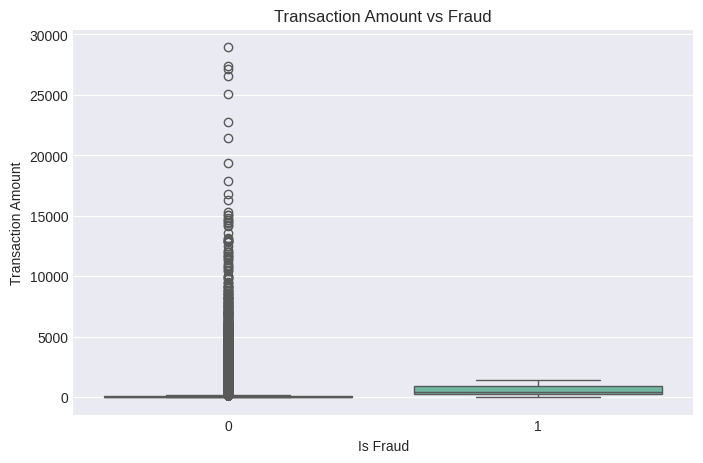

In [20]:
amt_stats = df.groupby('is_fraud')['amt'].describe()
print("Transaction Amount Statistics by Fraud Status")
display(amt_stats)
print("\n")

plt.figure(figsize=(8, 5))
sns.boxplot(x='is_fraud', y='amt', data=df)
plt.title("Transaction Amount vs Fraud")
plt.xlabel("Is Fraud")
plt.ylabel("Transaction Amount")
plt.show()


##7.3 City Population vs. Fraud Relationship


City Population Statistics by Fraud Status


,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,1842743.0,88636.579284,301462.369283,23.0,741.0,2443.0,20328.0,2906700.0
1,9651.0,89998.422961,306283.338105,23.0,795.0,2693.0,19054.0,2906700.0


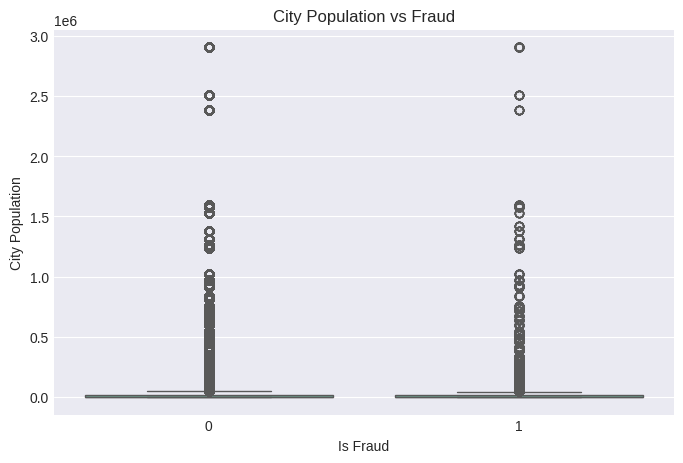

In [21]:
citypop_stats = df.groupby('is_fraud')['city_pop'].describe()
print("City Population Statistics by Fraud Status")
display(citypop_stats)
print("\n")

plt.figure(figsize=(8, 5))
sns.boxplot(x='is_fraud', y='city_pop', data=df)
plt.title("City Population vs Fraud")
plt.xlabel("Is Fraud")
plt.ylabel("City Population")
plt.show()


##7.4 Transaction Category vs. Fraud Relationship


Transaction Category by Fraud Status


is_fraud,0,1
category,,
entertainment,133826,292
food_dining,130524,205
gas_transport,187257,772
grocery_net,64703,175
grocery_pos,173963,2228
health_fitness,122368,185
home,175195,265
kids_pets,161423,304
misc_net,89472,1182


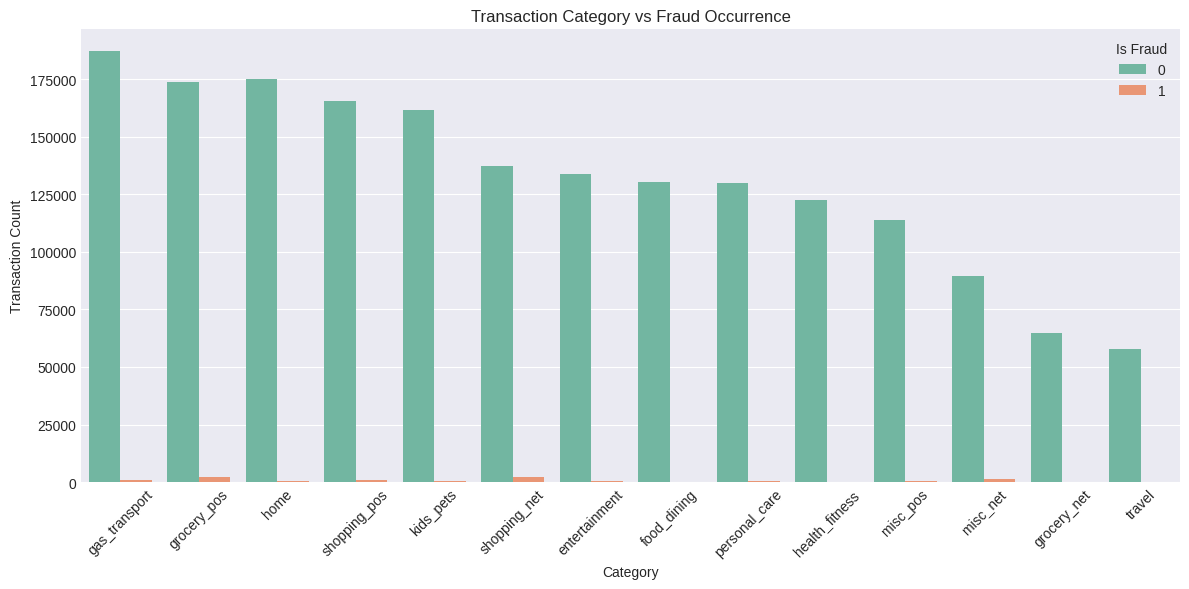

In [22]:
category_fraud_counts = df.groupby(['category', 'is_fraud']).size().unstack(fill_value=0)
print("Transaction Category by Fraud Status")
display(category_fraud_counts)
print("\n")

plt.figure(figsize=(12, 6))
sns.countplot(x='category', hue='is_fraud', data=df, order=df['category'].value_counts().index)
plt.title("Transaction Category vs Fraud Occurrence")
plt.xlabel("Category")
plt.ylabel("Transaction Count")
plt.xticks(rotation=45)
plt.legend(title="Is Fraud")
plt.tight_layout()
plt.show()


#8.Data Pre-processing

##8.1 Check for Missing Values

In [23]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    print("Missing Values Found:")
    print(missing_values)
else:
    print("No missing values found in the dataset.")


No missing values found in the dataset.


##8.2 Check for Duplicate Records

             Type    Count
0  Duplicate Rows        0
1     Unique Rows  1852394


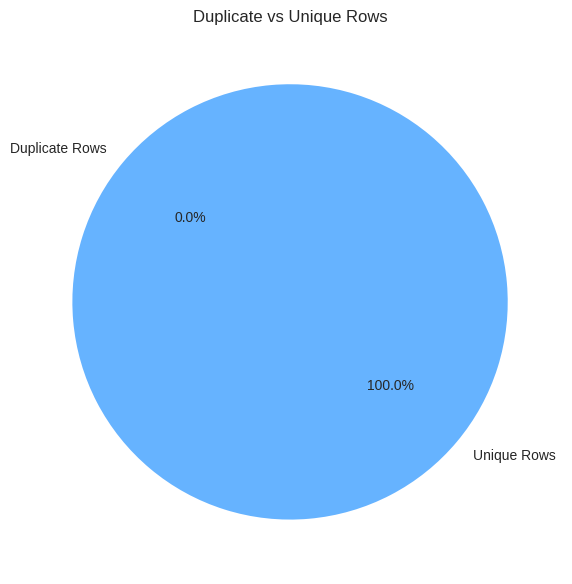

In [24]:
total_duplicates = df.duplicated().sum()
non_duplicates = len(df) - total_duplicates
duplicate_table = pd.DataFrame({
    'Type': ['Duplicate Rows', 'Unique Rows'],
    'Count': [total_duplicates, non_duplicates]
})
print(duplicate_table)

plt.figure(figsize=(6, 6))
plt.pie([total_duplicates, non_duplicates],
        labels=['Duplicate Rows', 'Unique Rows'],
        autopct='%1.1f%%',
        colors=['#ff9999', '#66b3ff'],
        startangle=140)
plt.title("Duplicate vs Unique Rows")
plt.tight_layout()
plt.show()


##8.3 Detect Outliers Using IQR Method

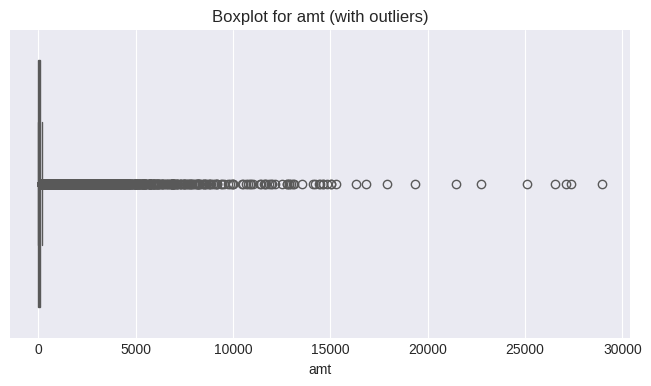

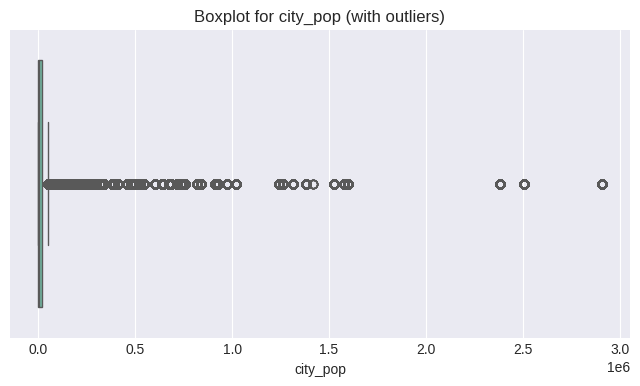

    Feature  Outlier Count
0       amt          95054
1  city_pop         346191


In [25]:
numeric_cols = ['amt', 'city_pop']
outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col} (with outliers)')
    plt.show()

outlier_table = pd.DataFrame(list(outlier_summary.items()), columns=['Feature', 'Outlier Count'])
print(outlier_table)



##8.4 Remove outliers from amt variable

In [26]:
Q1 = df['amt'].quantile(0.25)
Q3 = df['amt'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df['amt'] >= lower_bound) & (df['amt'] <= upper_bound)]

outlier_removed_table = pd.DataFrame({
    'Original Row Count': [len(df)],
    'Cleaned Row Count': [len(df_cleaned)],
    'Removed Outliers': [len(df) - len(df_cleaned)]
})

print(outlier_removed_table)


   Original Row Count  Cleaned Row Count  Removed Outliers
0             1852394            1757340             95054


#9.Feature Scaling and Normalization

In [27]:
numerical_columns_to_normalize = ['amt', 'city_pop']
scaler = MinMaxScaler()
df[numerical_columns_to_normalize] = scaler.fit_transform(df[numerical_columns_to_normalize])

print(df[numerical_columns_to_normalize].head())


        amt  city_pop
0  0.000137  0.001194
1  0.003670  0.000043
2  0.007569  0.001421
3  0.001520  0.000659
4  0.001415  0.000026


#10.Encode Categorical Variables



##10.1 Binary Encoding of 'gender' variable

In [28]:
df['gender'] = df['gender'].map({'F': 0, 'M': 1})
print("Gender column successfully encoded (F = 0, M = 1)")
print(df['gender'].value_counts())


Gender column successfully encoded (F = 0, M = 1)
gender
0    1014749
1     837645
Name: count, dtype: int64


##10.2 One-Hot Encoding of Multi-Class Categorical variable

In [29]:
one_hot_columns = ['category']
encoded_df = pd.get_dummies(df[one_hot_columns], prefix=one_hot_columns, drop_first=True)
encoded_df = encoded_df.astype(int)
df = pd.concat([df, encoded_df], axis=1)

print("One-Hot Encoding completed for:", one_hot_columns)
print("New total columns in the dataset:", df.shape[1])

encoded_cols = [col for col in df.columns if col.startswith('category_')]
print("Sample encoded columns:", encoded_cols[:10])



One-Hot Encoding completed for: ['category']
New total columns in the dataset: 35
Sample encoded columns: ['category_food_dining', 'category_gas_transport', 'category_grocery_net', 'category_grocery_pos', 'category_health_fitness', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_misc_pos', 'category_personal_care']


#11.Feature Engineering

##11.1 Convert Transaction Time to Date Features



In [30]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['year'] = df['trans_date_trans_time'].dt.year
df['month'] = df['trans_date_trans_time'].dt.month.astype(str).str.zfill(2)
df['day'] = df['trans_date_trans_time'].dt.day.astype(str).str.zfill(2)
df['hour'] = df['trans_date_trans_time'].dt.hour
df['minute'] = df['trans_date_trans_time'].dt.minute
df.drop('trans_date_trans_time', axis=1, inplace=True)
print(df[['year', 'month', 'day', 'hour', 'minute']].head())


   year month day  hour  minute
0  2019    01  01     0       0
1  2019    01  01     0       0
2  2019    01  01     0       0
3  2019    01  01     0       1
4  2019    01  01     0       3


##11.2 Convert 'dob' to datetime and calculate age



In [31]:
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
def calculate_age(born):
    if pd.isnull(born):
        return None
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df['age'] = df['dob'].apply(calculate_age)
print(df[['dob', 'age']].head())


         dob  age
0 1988-03-09   37
1 1978-06-21   47
2 1962-01-19   63
3 1967-01-12   58
4 1986-03-28   39


##11.3 Transaction Frequency per User

In [32]:
df['transaction_time'] = pd.to_datetime(df['unix_time'], unit='s')
df = df.sort_values(by=['cc_num', 'transaction_time'])

def count_transactions_last_24h(group):
    return group.set_index('transaction_time') \
                .rolling('1D').cc_num.count() - 1

df['transactions_last_24h'] = df.groupby('cc_num', group_keys=False) \
                                 .apply(count_transactions_last_24h) \
                                 .fillna(0).astype(int) \
                                 .reset_index(drop=True)

print(df[['cc_num', 'transaction_time', 'transactions_last_24h']].head(10))



           cc_num    transaction_time  transactions_last_24h
1017  60416207185 2012-01-01 12:47:15                      4
2724  60416207185 2012-01-02 08:44:57                      6
2726  60416207185 2012-01-02 08:47:36                      5
2882  60416207185 2012-01-02 12:38:14                      4
2907  60416207185 2012-01-02 13:10:46                      1
4135  60416207185 2012-01-03 13:56:35                      3
4337  60416207185 2012-01-03 17:05:10                     10
5467  60416207185 2012-01-04 13:59:55                      1
6027  60416207185 2012-01-04 21:17:22                      0
6273  60416207185 2012-01-05 00:42:24                      0


/tmp/ipython-input-1334670959.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(count_transactions_last_24h) \


#12.Data Splitting: Training, Validation and Test

In [33]:
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)



In [34]:
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)


Training set: (1296675, 41) (1296675,)
Validation set: (277859, 41) (277859,)
Test set: (277860, 41) (277860,)


In [35]:
print("\nFraud ratio in each set:")
print("Train:", y_train.mean())
print("Validation:", y_val.mean())
print("Test:", y_test.mean())



Fraud ratio in each set:
Train: 0.005210249291456996
Validation: 0.005207677275164742
Test: 0.005211257467789534


#13.Apply SMOTE only on training set

Before SMOTE:
is_fraud
0    1289919
1       6756
Name: count, dtype: int64 

After SMOTE:
is_fraud
0    1289919
1    1289919
Name: count, dtype: int64

New Training Set Shape: (2579838, 25) (2579838,)


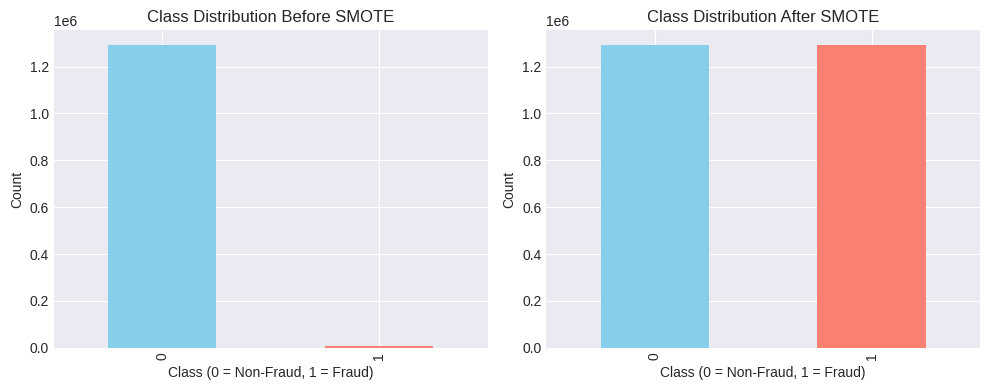

In [36]:
from imblearn.over_sampling import SMOTE

X_train_numeric = X_train.select_dtypes(include=['int64', 'float64'])

smote = SMOTE(random_state=42, sampling_strategy='auto')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_numeric, y_train)

print("Before SMOTE:")
print(y_train.value_counts(), "\n")

print("After SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

print("\nNew Training Set Shape:", X_train_resampled.shape, y_train_resampled.shape)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

y_train.value_counts().plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
axes[0].set_title("Class Distribution Before SMOTE")
axes[0].set_xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
axes[0].set_ylabel("Count")

pd.Series(y_train_resampled).value_counts().plot(kind='bar', ax=axes[1], color=['skyblue', 'salmon'])
axes[1].set_title("Class Distribution After SMOTE")
axes[1].set_xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


#14.Train LightGBM Before and After Feature Selection

In [37]:
import lightgbm as lgb
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, confusion_matrix
)



In [38]:
X_train_resampled_num = X_train_resampled.select_dtypes(include=['int64', 'float64'])
X_val_num = X_val.select_dtypes(include=['int64', 'float64'])


##14.1 Train LightGBM Before Feature Selection

In [39]:
lgb_clf_full = lgb.LGBMClassifier(
    n_estimators=500,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

lgb_clf_full.fit(X_train_resampled_num, y_train_resampled)

y_val_pred_full = lgb_clf_full.predict(X_val_num)
y_val_pred_proba_full = lgb_clf_full.predict_proba(X_val_num)[:, 1]

print("Before Feature Selection Model Result:\n")
print("Precision:", precision_score(y_val, y_val_pred_full))
print("Recall:", recall_score(y_val, y_val_pred_full))
print("F1-Score:", f1_score(y_val, y_val_pred_full))
print("ROC AUC:", roc_auc_score(y_val, y_val_pred_proba_full))
print("PR AUC:", average_precision_score(y_val, y_val_pred_proba_full))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_full))



[LightGBM] [Info] Number of positive: 1289919, number of negative: 1289919
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.120706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2431
[LightGBM] [Info] Number of data points in the train set: 2579838, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Before Feature Selection Model Result:

Precision: 0.2553970701619121
Recall: 0.9156876295784382
F1-Score: 0.39939713639789
ROC AUC: 0.9940300748536576
PR AUC: 0.8339642331277913
Confusion Matrix:
 [[272549   3863]
 [   122   1325]]


##14.2 Feature Importance Chart (Before Selection)

                    Feature  Importance
7                 unix_time        3387
23                      age        1549
6                  city_pop        1471
0                    cc_num        1440
1                       amt        1434
4                       lat         976
3                       zip         812
5                      long         778
8                 merch_lat         568
9                merch_long         477
2                    gender         285
24    transactions_last_24h         277
18        category_misc_pos         156
21    category_shopping_pos         148
10     category_food_dining         143
20    category_shopping_net         135
17        category_misc_net         135
13     category_grocery_pos         126
19   category_personal_care         119
15            category_home         116
16       category_kids_pets         107
22          category_travel          98
11   category_gas_transport          96
14  category_health_fitness          94


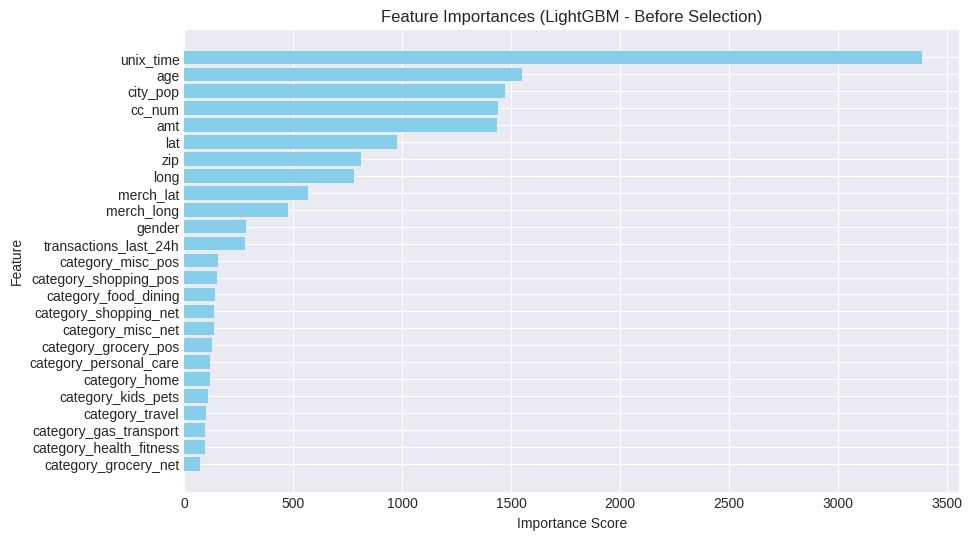

In [40]:
feature_importances = pd.DataFrame({
    'Feature': X_train_resampled_num.columns,
    'Importance': lgb_clf_full.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances,"\n")

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'][:25], feature_importances['Importance'][:25], color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importances (LightGBM - Before Selection)")
plt.gca().invert_yaxis()
plt.show()



##14.3 Feature Selection using LightGBM Importance

In [41]:
selector = SelectFromModel(lgb_clf_full, threshold="median", prefit=True)
selected_features = X_train_resampled_num.columns[(selector.get_support())]

print("\nSelected Features:", list(selected_features),"\n")
print("Number of features selected:", len(selected_features),"\n")

X_train_selected = selector.transform(X_train_resampled_num)
X_val_selected = selector.transform(X_val_num)




Selected Features: ['cc_num', 'amt', 'gender', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'category_misc_pos', 'age', 'transactions_last_24h'] 

Number of features selected: 13 



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


##14.4 Train LightGBM AFTER Feature Selection

In [42]:
lgb_clf_selected = lgb.LGBMClassifier(
    n_estimators=500,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

lgb_clf_selected.fit(X_train_selected, y_train_resampled)

y_val_pred_sel = lgb_clf_selected.predict(X_val_selected)
y_val_pred_proba_sel = lgb_clf_selected.predict_proba(X_val_selected)[:, 1]

print("\nAfter Feature Selection Model Result:\n")
print("Precision:", precision_score(y_val, y_val_pred_sel))
print("Recall:", recall_score(y_val, y_val_pred_sel))
print("F1-Score:", f1_score(y_val, y_val_pred_sel))
print("ROC AUC:", roc_auc_score(y_val, y_val_pred_proba_sel))
print("PR AUC:", average_precision_score(y_val, y_val_pred_proba_sel),"\n")
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_sel))



[LightGBM] [Info] Number of positive: 1289919, number of negative: 1289919
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.099352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2407
[LightGBM] [Info] Number of data points in the train set: 2579838, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



After Feature Selection Model Result:

Precision: 0.1529368754569827
Recall: 0.8673116793365584
F1-Score: 0.26002279084222524
ROC AUC: 0.9718345320604067
PR AUC: 0.591107796620466 

Confusion Matrix:
 [[269461   6951]
 [   192   1255]]


##14.5 Feature Importance Chart (After Selection)

                  Feature  Importance
7               unix_time        3809
6                city_pop        1663
11                    age        1541
0                  cc_num        1483
1                     amt        1366
4                     lat        1067
3                     zip         882
5                    long         841
8               merch_lat         743
9              merch_long         729
12  transactions_last_24h         469
2                  gender         258
10      category_misc_pos         149 



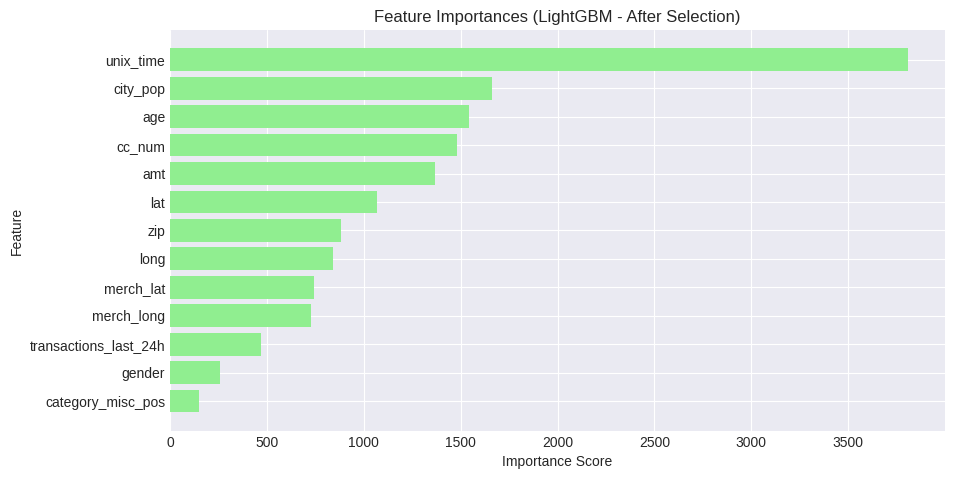

In [43]:
feature_importances_after = pd.DataFrame({
    'Feature': selected_features,
    'Importance': lgb_clf_selected.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances_after,"\n")

plt.figure(figsize=(10, len(feature_importances_after) * 0.4))
plt.barh(feature_importances_after['Feature'], feature_importances_after['Importance'], color='lightgreen')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importances (LightGBM - After Selection)")
plt.gca().invert_yaxis()
plt.show()



##14.6 Comparison Table

In [44]:
results_df = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1-Score", "ROC AUC", "PR AUC"],
    "Before Selection": [
        precision_score(y_val, y_val_pred_full),
        recall_score(y_val, y_val_pred_full),
        f1_score(y_val, y_val_pred_full),
        roc_auc_score(y_val, y_val_pred_proba_full),
        average_precision_score(y_val, y_val_pred_proba_full)
    ],
    "After Selection": [
        precision_score(y_val, y_val_pred_sel),
        recall_score(y_val, y_val_pred_sel),
        f1_score(y_val, y_val_pred_sel),
        roc_auc_score(y_val, y_val_pred_proba_sel),
        average_precision_score(y_val, y_val_pred_proba_sel)
    ]
})

print("\nPerformance Comparison:\n")
print(results_df)




Performance Comparison:

      Metric  Before Selection  After Selection
0  Precision          0.255397         0.152937
1     Recall          0.915688         0.867312
2   F1-Score          0.399397         0.260023
3    ROC AUC          0.994030         0.971835
4     PR AUC          0.833964         0.591108


##14.7 Bar Chart for Visual Comparison


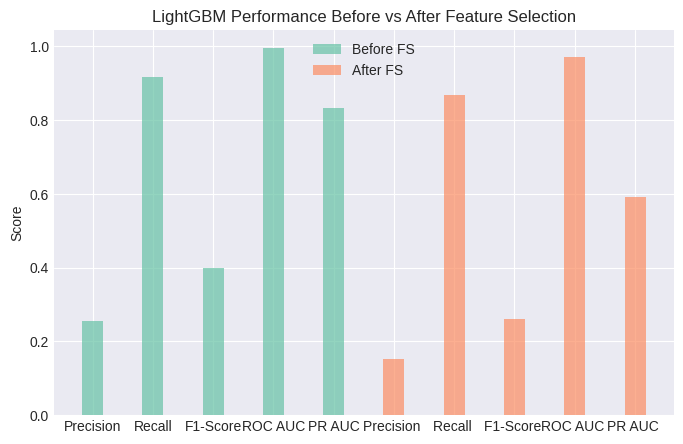

In [45]:
plt.figure(figsize=(8, 5))
bar_width = 0.35
metrics = results_df["Metric"]
before_scores = results_df["Before Selection"]
after_scores = results_df["After Selection"]

plt.bar(metrics, before_scores, bar_width, label='Before FS', alpha=0.7)
plt.bar([m + " " for m in metrics], after_scores, bar_width, label='After FS', alpha=0.7)

plt.ylabel("Score")
plt.title("LightGBM Performance Before vs After Feature Selection")
plt.legend()
plt.show()



#15.Baseline Models for Fraud Detection

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix




##15.1 Function to Evaluate a Trained Model

In [47]:
def evaluate_model(name, model, X_val, y_val):
    """Evaluates a model on validation set and stores metrics."""
    y_pred = model.predict(X_val)

    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_val)[:, 1]
    else:
        y_pred_proba = model.decision_function(X_val)

    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred_proba)
    pr_auc = average_precision_score(y_val, y_pred_proba)
    cm = confusion_matrix(y_val, y_pred)

    results_list.append({
        "Model": name,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC AUC": roc_auc,
        "PR AUC": pr_auc,
        "Confusion Matrix": cm
    })


In [48]:
X_val_numeric = X_val.select_dtypes(include=['int64', 'float64'])
results_list = []


##15.2 Train Baseline Models

In [49]:
lr_model = LogisticRegression(
    max_iter=200,
    solver='saga',
    penalty='l2',
    random_state=42,
    n_jobs=-1
)

lr_model.fit(X_train_resampled, y_train_resampled)
evaluate_model("Logistic Regression", lr_model, X_val_numeric, y_val)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [50]:
rf_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_resampled, y_train_resampled)
evaluate_model("Random Forest", rf_model, X_val_numeric, y_val)



In [51]:
from sklearn.svm import LinearSVC

svm_linear = LinearSVC(class_weight='balanced', random_state=42, max_iter=2000)
svm_linear.fit(X_train_resampled, y_train_resampled)
evaluate_model("Linear SVM", svm_linear, X_val_numeric, y_val)



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [52]:
nb_model = GaussianNB()
nb_model.fit(X_train_resampled, y_train_resampled)
evaluate_model("Naive Bayes", nb_model, X_val_numeric, y_val)



##15.3 Baseline Models Performance

In [53]:
results_df = pd.DataFrame(results_list)
print("\nBaseline Model Performance Metrics:\n")
print(results_df[["Model", "Precision", "Recall", "F1-Score", "ROC AUC", "PR AUC"]])



Baseline Model Performance Metrics:

                 Model  Precision    Recall  F1-Score   ROC AUC    PR AUC
0  Logistic Regression   0.000000  0.000000  0.000000  0.505442  0.005459
1        Random Forest   0.129363  0.812025  0.223172  0.954939  0.323638
2           Linear SVM   0.000000  0.000000  0.000000  0.505478  0.005510
3          Naive Bayes   0.005206  0.908086  0.010353  0.501285  0.005314


##15.4 Confusion Matrices

In [54]:
for res in results_list:
    print(f"\n{res['Model']} - Confusion Matrix:\n{res['Confusion Matrix']}")



Logistic Regression - Confusion Matrix:
[[276412      0]
 [  1447      0]]

Random Forest - Confusion Matrix:
[[268504   7908]
 [   272   1175]]

Linear SVM - Confusion Matrix:
[[276412      0]
 [  1447      0]]

Naive Bayes - Confusion Matrix:
[[ 25332 251080]
 [   133   1314]]


##15.5 Model Comparison Charts

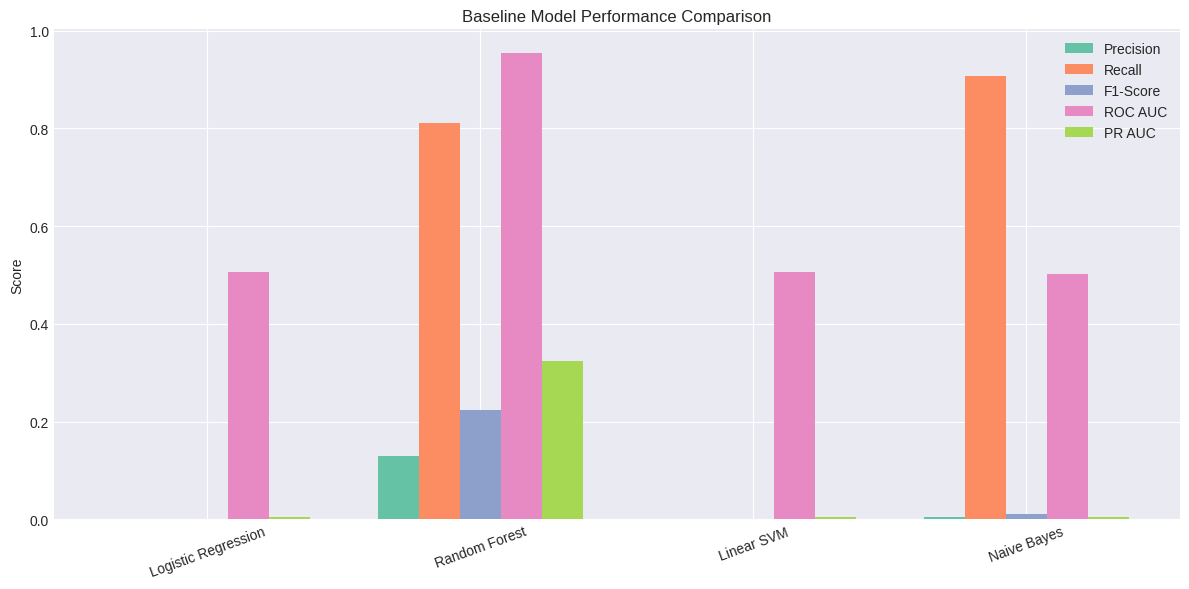

In [55]:
metrics_to_plot = ["Precision", "Recall", "F1-Score", "ROC AUC", "PR AUC"]

plt.figure(figsize=(12, 6))
x = np.arange(len(results_df["Model"]))
bar_width = 0.15

for i, metric in enumerate(metrics_to_plot):
    plt.bar(x + i * bar_width, results_df[metric], width=bar_width, label=metric)

plt.xticks(x + bar_width * 2, results_df["Model"], rotation=20)
plt.ylabel("Score")
plt.title("Baseline Model Performance Comparison")
plt.legend()
plt.tight_layout()
plt.show()


#16.Evaluate All Models on the Validation/Test Set

##16.1 Evaluate All Models on Test Set

In [57]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix

def evaluate_model_test(name, model, X_test, y_test, results_list):
    """
    Evaluates a trained model on the test set and appends results to a list.
    """
    y_pred = model.predict(X_test)

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test)
    else:
        y_proba = None

    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    pr_auc = average_precision_score(y_test, y_proba) if y_proba is not None else None

    results_list.append({
        "Model": name,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC AUC": roc_auc,
        "PR AUC": pr_auc
    })

    print(f"\n{name} - Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



##16.2 Test Set Performance Results

In [70]:
X_test_numeric = X_test.select_dtypes(include=['int64', 'float64'])


In [71]:
test_results = []

evaluate_model_test("LightGBM", lgb_clf_full, X_test_numeric, y_test, test_results)
evaluate_model_test("Logistic Regression", lr_model, X_test_numeric, y_test, test_results)
evaluate_model_test("Random Forest", rf_model, X_test_numeric, y_test, test_results)
evaluate_model_test("Linear SVM", svm_linear, X_test_numeric, y_test, test_results)
evaluate_model_test("Naive Bayes", nb_model, X_test_numeric, y_test, test_results)



LightGBM - Confusion Matrix:
[[272518   3894]
 [   112   1336]]

Logistic Regression - Confusion Matrix:
[[276412      0]
 [  1448      0]]

Random Forest - Confusion Matrix:
[[268545   7867]
 [   236   1212]]

Linear SVM - Confusion Matrix:
[[276412      0]
 [  1448      0]]

Naive Bayes - Confusion Matrix:
[[ 25253 251159]
 [   123   1325]]


In [65]:
test_results_df = pd.DataFrame(test_results)
print("\nFinal Test Set Performance:\n")
print(test_results_df)




Final Test Set Performance:

                 Model  Precision    Recall  F1-Score   ROC AUC    PR AUC
0             LightGBM   0.255449  0.922652  0.400120  0.994917  0.842485
1  Logistic Regression   0.000000  0.000000  0.000000  0.515023  0.005850
2        Random Forest   0.133495  0.837017  0.230265  0.957107  0.337298
3           Linear SVM   0.000000  0.000000  0.000000  0.515055  0.006089
4          Naive Bayes   0.005248  0.915055  0.010436  0.501553  0.005364


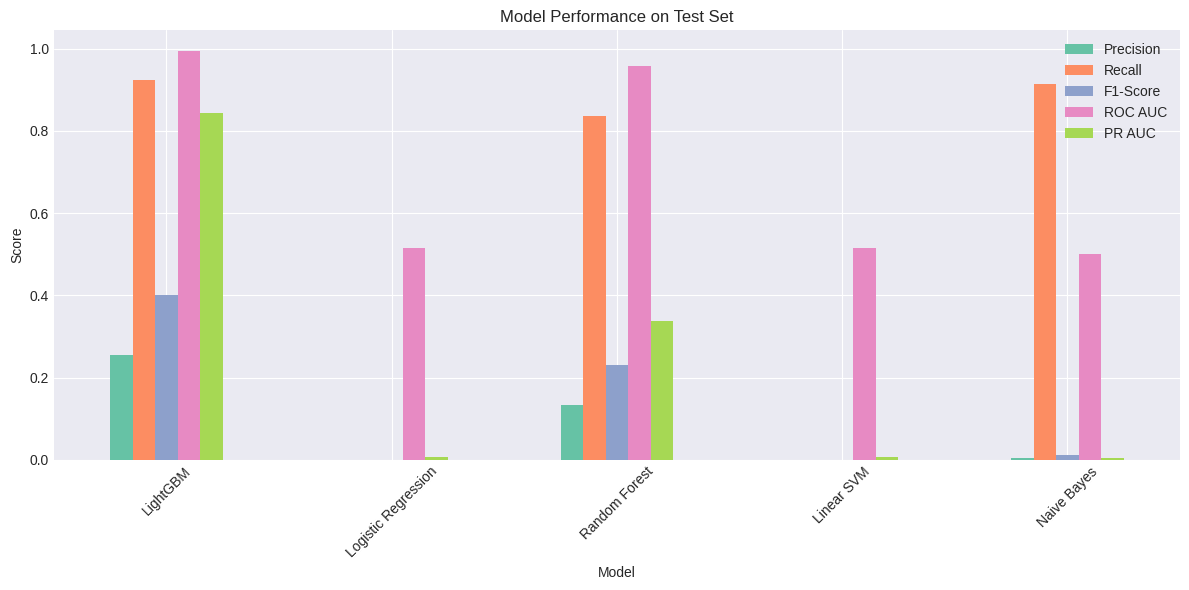

In [72]:
test_results_df.set_index("Model")[["Precision", "Recall", "F1-Score", "ROC AUC", "PR AUC"]].plot(
    kind="bar", figsize=(12,6), title="Model Performance on Test Set"
)
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#17.Develop a Model Comparison Framework (Reusable)

In [ ]:
import time
import numpy as np
import pandas as pd

from sklearn.base import clone
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, confusion_matrix
)

import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC


def _scores(y_true, y_pred, y_proba):
    return {
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall":    recall_score(y_true, y_pred, zero_division=0),
        "F1-Score":  f1_score(y_true, y_pred, zero_division=0),
        "ROC AUC":   roc_auc_score(y_true, y_proba) if len(np.unique(y_true)) > 1 else np.nan,
        "PR AUC":    average_precision_score(y_true, y_proba)
    }


def _best_threshold_for_f1(y_true, y_proba):
    thresholds = np.linspace(0.01, 0.99, 99)
    best_thr, best_f1 = 0.5, -1.0
    for thr in thresholds:
        y_pred = (y_proba >= thr).astype(int)
        f1 = f1_score(y_true, y_pred, zero_division=0)
        if f1 > best_f1:
            best_f1 = f1
            best_thr = thr
    return best_thr, best_f1


def _fit_with_calibration_if_needed(model, X_train, y_train, calibration_method='sigmoid'):
    """
    Ensures we end up with a model that exposes predict_proba.
    If the base model lacks predict_proba, we calibrate a fitted clone.
    """
    base = clone(model)
    if hasattr(base, "predict_proba"):
        t0 = time.perf_counter()
        base.fit(X_train, y_train)
        fit_time = time.perf_counter() - t0
        return base, fit_time, False

    t0 = time.perf_counter()
    base.fit(X_train, y_train)
    calib = CalibratedClassifierCV(base_estimator=base, method=calibration_method, cv='prefit')
    calib.fit(X_train, y_train)
    fit_time = time.perf_counter() - t0
    return calib, fit_time, True


def _eval_split(trained_model, X, y, threshold):
    t0 = time.perf_counter()
    y_proba = trained_model.predict_proba(X)[:, 1]
    pred_time = time.perf_counter() - t0

    y_pred = (y_proba >= threshold).astype(int)
    metrics = _scores(y, y_pred, y_proba)
    cm = confusion_matrix(y, y_pred)

    out = {
        **metrics,
        "Threshold": threshold,
        "Predict_Time_s": pred_time,
        "Confusion_Matrix": cm
    }
    return out


def compare_models_framework(
    models_dict,
    X_train_resampled, y_train_resampled,
    X_val, y_val,
    X_test, y_test,
    calibration_method='sigmoid'
):
    """
    Trains each model, tunes threshold on validation (max F1), evaluates on validation and test.
    Returns: (validation_results_df, test_results_df, trained_models, chosen_thresholds)
    """
    val_rows, test_rows = [], []
    trained_models, chosen_thresholds = {}, {}

    for name, model in models_dict.items():
        print(f"\n=== {name} ===")

        fitted, fit_time, calibrated = _fit_with_calibration_if_needed(
            model, X_train_resampled, y_train_resampled, calibration_method=calibration_method
        )
        trained_models[name] = fitted

        y_val_proba = fitted.predict_proba(X_val)[:, 1]
        best_thr, best_f1 = _best_threshold_for_f1(y_val, y_val_proba)
        chosen_thresholds[name] = best_thr

        val_eval = _eval_split(fitted, X_val, y_val, best_thr)
        val_rows.append({
            "Model": name,
            "Fit_Time_s": fit_time,
            "Calibrated": calibrated,
            **val_eval
        })

        test_eval = _eval_split(fitted, X_test, y_test, best_thr)
        test_rows.append({
            "Model": name,
            "Fit_Time_s": fit_time,
            "Calibrated": calibrated,
            **test_eval
        })

    val_df = pd.DataFrame(val_rows).sort_values(by=["PR AUC", "F1-Score", "Recall"], ascending=False)
    test_df = pd.DataFrame(test_rows).sort_values(by=["PR AUC", "F1-Score", "Recall"], ascending=False)

    return val_df, test_df, trained_models, chosen_thresholds


models = {
    "LightGBM": lgb.LGBMClassifier(
        n_estimators=500, random_state=42, class_weight='balanced', n_jobs=-1
    ),
    "RandomForest": RandomForestClassifier(
        n_estimators=50, max_depth=10, class_weight='balanced', random_state=42, n_jobs=-1
    ),
    "LogisticRegression": LogisticRegression(
        max_iter=300, class_weight='balanced', solver='saga', n_jobs=-1
    ),
    "LinearSVM": LinearSVC(
        class_weight='balanced', random_state=42, max_iter=2000
    ),
    "NaiveBayes": GaussianNB()
}

val_results, test_results, fitted_models, thresholds = compare_models_framework(
    models_dict=models,
    X_train_resampled=X_train_resampled, y_train_resampled=y_train_resampled,
    X_val=X_val_numeric, y_val=y_val,
    X_test=X_test_numeric, y_test=y_test,
    calibration_method='sigmoid'
)

print("\nValidation Results:")
print(val_results,"\n")

print("\nTest Results:")
print(test_results,"\n")

print("\nChosen thresholds (from Validation):")
print(thresholds,"\n")

